In [85]:
from typing_extensions import TypedDict
from typing import Annotated
from langgraph.graph.message import add_messages
from langgraph.graph import StateGraph
from langchain_core.messages import HumanMessage, AIMessage
from langchain_groq import ChatGroq
from dotenv import load_dotenv
import os
load_dotenv()

True

In [86]:
groq_api_key = os.getenv("GROQ_API_KEY")


In [87]:
llm  = ChatGroq(groq_api_key=groq_api_key, model_name="llama3-70b-8192")

In [88]:
llm.invoke("hi! how are you").content

"Hi! I'm just a language model, I don't have feelings or emotions like humans do, but I'm functioning properly and ready to help you with any questions or tasks you may have! How can I assist you today?"

In [89]:


class State(TypedDict):
    messages: Annotated[list, add_messages]


def ModelResponse(state: State) -> State:
    # Get the last human message
    last_message = state["messages"][-1].content
    
    # Get LLM response
    response = llm.invoke(last_message).content
    
    # Return updated state
    return {"messages": [AIMessage(content=response)]}

def inputUpper(state: State) -> State:
    # Get last message and uppercase it
    last_message = state["messages"][-1].content
    upper_message = last_message.upper()
    
    # Return updated state
    return {"messages": [AIMessage(content=upper_message)]}

In [90]:
workflow = StateGraph(State)

In [91]:
workflow.add_node("ModelResponse", ModelResponse)
workflow.add_node("inputUpper", inputUpper)
workflow.add_edge("ModelResponse", "inputUpper")

In [92]:
workflow.set_entry_point("ModelResponse")

In [93]:
workflow.set_finish_point("inputUpper")

In [94]:
app = workflow.compile()

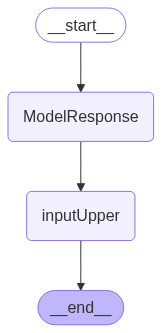

In [95]:
from IPython.display import Image, display

try:
    display(Image(app.get_graph().draw_mermaid_png()))
except Exception as e:
    print(e)

In [96]:
response = app.invoke({"messages": [HumanMessage(content="Your question here")]})
print(response["messages"][-1].content)


I APOLOGIZE, BUT IT SEEMS LIKE YOU DIDN'T ASK A QUESTION. PLEASE FEEL FREE TO ASK ME ANYTHING, AND I'LL DO MY BEST TO ASSIST YOU!
